In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [7]:
# Loading data
file_path = "../Housing-Capstone/database/zillow_sbux.csv"
df_housing = pd.read_csv(file_path)
df_housing

,rowcount,propertytype,lotareavalue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingarea,sb_id,sb_id-2,store_name
0,0,SINGLE_FAMILY,0.510000,27610,251000,3.0,-78.542496,35.758920,6402949,2.0,1515.0,1,1,Harris Teeter-Apex #58
1,1,SINGLE_FAMILY,0.620000,27604,265000,3.0,-78.566910,35.827520,6416297,2.0,1251.0,2,2,Kroger-Apex #357
2,2,SINGLE_FAMILY,0.190000,27608,1352000,4.0,-78.634760,35.804733,6421830,4.0,3169.0,3,3,Super Target Apex ST-1932
3,3,SINGLE_FAMILY,0.359986,27511,510000,3.0,-78.777230,35.782860,6428563,1.0,1216.0,31,31,Harris Teeter Cary 331
4,4,SINGLE_FAMILY,0.290000,27607,560000,3.0,-78.687560,35.825516,6439560,2.0,1635.0,32,32,Cary Towne Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35,SINGLE_FAMILY,0.340000,27523,635000,4.0,-78.883300,35.759610,50116002,3.0,2337.0,258,258,RDU T1 Baggage Claim
996,36,SINGLE_FAMILY,0.040000,27614,360000,3.0,-78.590454,35.908638,50116351,3.0,1686.0,270,270,Stonehenge
997,37,SINGLE_FAMILY,0.550000,27587,482500,3.0,-78.540474,36.004005,50119795,3.0,1940.0,271,271,Teavana - Crabtree Valley Mall
998,38,SINGLE_FAMILY,0.170000,27617,549900,4.0,-78.732414,35.905746,50120492,3.0,1953.0,272,272,Capital & Spring Forest


In [8]:
df_housing = df_housing.drop(['rowcount', 'zpid', 'sb_id','sb_id-2'], axis=1)
df_housing

,propertytype,lotareavalue,address,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name
0,SINGLE_FAMILY,0.510000,27610,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58
1,SINGLE_FAMILY,0.620000,27604,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357
2,SINGLE_FAMILY,0.190000,27608,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932
3,SINGLE_FAMILY,0.359986,27511,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331
4,SINGLE_FAMILY,0.290000,27607,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center
...,...,...,...,...,...,...,...,...,...,...
995,SINGLE_FAMILY,0.340000,27523,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim
996,SINGLE_FAMILY,0.040000,27614,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge
997,SINGLE_FAMILY,0.550000,27587,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall
998,SINGLE_FAMILY,0.170000,27617,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest


In [ ]:
# Get the unique values of 'address' column
df_housing.address.unique()

In [ ]:
df_housing['address'] = df_housing['address'].astype(float)

In [ ]:
# creating a new dataframe 27613
df_27613 = df_housing[df_housing['address'] ==27613]
  
print(df_27613)

In [ ]:
# creating a new dataframe 27587
df_27587 = df_housing[df_housing['address'] ==27587]
  
print(df_27587)

In [ ]:
# creating a new dataframe 27539
df_27539 = df_housing[df_housing['address'] ==27539]
  
print(df_27539)

In [ ]:
# creating a new dataframe '27616', '27518', '27526', '27562', '27529', '27540', '27607', '27606', '27571', '27615', '27617',
# '27513', '27603', '27591', '27519', '27592', '27545', '27604', '27523', '27511', '27609', '27610', '27502', '27614', '27601',
# '27560', '27612', '27608', '27605', '27597', '27520', '27501', '27596'
df_27616 = df_housing[df_housing['address'] ==27616]
df_27518 = df_housing[df_housing['address'] ==27518]
df_27526 = df_housing[df_housing['address'] ==27526]
df_27562 = df_housing[df_housing['address'] ==27562]
df_27529 = df_housing[df_housing['address'] ==27529]
df_27540 = df_housing[df_housing['address'] ==27540]
df_27607 = df_housing[df_housing['address'] ==27607]
df_27606 = df_housing[df_housing['address'] ==27606]
df_27571 = df_housing[df_housing['address'] ==27571]
df_27615 = df_housing[df_housing['address'] ==27615]
df_27617 = df_housing[df_housing['address'] ==27617]
df_27513 = df_housing[df_housing['address'] ==27513]
df_27603 = df_housing[df_housing['address'] ==27603]
df_27591 = df_housing[df_housing['address'] ==27591]
df_27519 = df_housing[df_housing['address'] ==27519]
df_27592 = df_housing[df_housing['address'] ==27592]
df_27545 = df_housing[df_housing['address'] ==27545]
df_27604 = df_housing[df_housing['address'] ==27604]
df_27523 = df_housing[df_housing['address'] ==27523]
df_27511 = df_housing[df_housing['address'] ==27511]
df_27609 = df_housing[df_housing['address'] ==27609]
df_27610 = df_housing[df_housing['address'] ==27610]
df_27502 = df_housing[df_housing['address'] ==27502]
df_27614 = df_housing[df_housing['address'] ==27614]
df_27601 = df_housing[df_housing['address'] ==27601]
df_27560 = df_housing[df_housing['address'] ==27560]
df_27612 = df_housing[df_housing['address'] ==27612]
df_27608 = df_housing[df_housing['address'] ==27608]
df_27605 = df_housing[df_housing['address'] ==27605]
df_27597 = df_housing[df_housing['address'] ==27597]
df_27520 = df_housing[df_housing['address'] ==27520]
df_27501 = df_housing[df_housing['address'] ==27501]
df_27596 = df_housing[df_housing['address'] ==27596]

In [ ]:
zipcode_df = [df_27616, df_27518, df_27526, df_27562, df_27529, df_27540, df_27607, df_27606, df_27571, df_27615,
              df_27617, df_27513, df_27603, df_27591, df_27519, df_27592, df_27545, df_27604, df_27523, df_27511,
              df_27609, df_27610, df_27502, df_27614, df_27601, df_27560, df_27612, df_27608, df_27605, df_27597,
              df_27520, df_27501, df_27596, df_27539, df_27587, df_27613]
print(zipcode_df)

In [9]:
df_housing['address'] = df_housing['address'].astype(str)

In [10]:
# Seperate each zipcode and assign a 1 or 0
pd.get_dummies(df_housing['address']).head()

,27501,27502,27511,27513,27518,27519,27520,27523,27526,27529,...,27607,27608,27609,27610,27612,27613,27614,27615,27616,27617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
# Drop address column
df_housing.drop('address', axis=1).head()

,propertytype,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name
0,SINGLE_FAMILY,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58
1,SINGLE_FAMILY,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357
2,SINGLE_FAMILY,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932
3,SINGLE_FAMILY,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331
4,SINGLE_FAMILY,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center


In [12]:
# Join shuffled and dummies dataframes
df_encoded = pd.concat([df_housing.drop('address', axis=1),
                             pd.get_dummies(df_housing['address'])], axis=1)
df_encoded

,propertytype,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name,27501,...,27607,27608,27609,27610,27612,27613,27614,27615,27616,27617
0,SINGLE_FAMILY,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58,0,...,0,0,0,1,0,0,0,0,0,0
1,SINGLE_FAMILY,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357,0,...,0,0,0,0,0,0,0,0,0,0
2,SINGLE_FAMILY,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932,0,...,0,1,0,0,0,0,0,0,0,0
3,SINGLE_FAMILY,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331,0,...,0,0,0,0,0,0,0,0,0,0
4,SINGLE_FAMILY,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SINGLE_FAMILY,0.340000,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim,0,...,0,0,0,0,0,0,0,0,0,0
996,SINGLE_FAMILY,0.040000,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge,0,...,0,0,0,0,0,0,1,0,0,0
997,SINGLE_FAMILY,0.550000,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall,0,...,0,0,0,0,0,0,0,0,0,0
998,SINGLE_FAMILY,0.170000,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df_encoded.to_csv('df encoded.csv')

In [58]:
df_livingarea = df_encoded
df_livingarea = df_livingarea.fillna(0)
df_livingarea

,propertytype,lotareavalue,price,bedrooms,longitude,latitude,bathrooms,livingarea,store_name,27501,...,27607,27608,27609,27610,27612,27613,27614,27615,27616,27617
0,SINGLE_FAMILY,0.510000,251000,3.0,-78.542496,35.758920,2.0,1515.0,Harris Teeter-Apex #58,0,...,0,0,0,1,0,0,0,0,0,0
1,SINGLE_FAMILY,0.620000,265000,3.0,-78.566910,35.827520,2.0,1251.0,Kroger-Apex #357,0,...,0,0,0,0,0,0,0,0,0,0
2,SINGLE_FAMILY,0.190000,1352000,4.0,-78.634760,35.804733,4.0,3169.0,Super Target Apex ST-1932,0,...,0,1,0,0,0,0,0,0,0,0
3,SINGLE_FAMILY,0.359986,510000,3.0,-78.777230,35.782860,1.0,1216.0,Harris Teeter Cary 331,0,...,0,0,0,0,0,0,0,0,0,0
4,SINGLE_FAMILY,0.290000,560000,3.0,-78.687560,35.825516,2.0,1635.0,Cary Towne Center,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SINGLE_FAMILY,0.340000,635000,4.0,-78.883300,35.759610,3.0,2337.0,RDU T1 Baggage Claim,0,...,0,0,0,0,0,0,0,0,0,0
996,SINGLE_FAMILY,0.040000,360000,3.0,-78.590454,35.908638,3.0,1686.0,Stonehenge,0,...,0,0,0,0,0,0,1,0,0,0
997,SINGLE_FAMILY,0.550000,482500,3.0,-78.540474,36.004005,3.0,1940.0,Teavana - Crabtree Valley Mall,0,...,0,0,0,0,0,0,0,0,0,0
998,SINGLE_FAMILY,0.170000,549900,4.0,-78.732414,35.905746,3.0,1953.0,Capital & Spring Forest,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
import plotly.express as px
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression

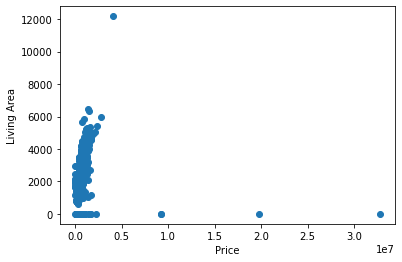

In [59]:
# Visually inspect relationship between zip and price
plt.scatter(df_livingarea.price, df_livingarea.livingarea)
plt.xlabel('Price')
plt.ylabel('Living Area')
plt.show()

In [60]:
# Formate data for Scikit-learn library
X = df_livingarea.price.values.reshape(-1,1)

In [68]:
# Assign target variable
y = df_livingarea.livingarea

In [69]:
# Create linear regression model
model = LinearRegression()

In [70]:
# Fitting the model
model.fit(X, y)

LinearRegression()

In [71]:
# Predict the model
y_pred = model.predict(X)
print(y_pred.shape)

(1000,)


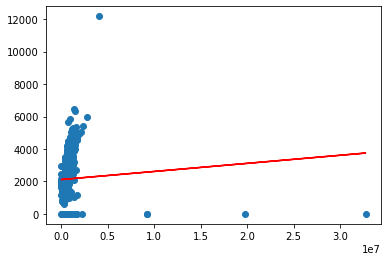

In [72]:
# Plot the model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [73]:
print(model.coef_)
print(model.intercept_)

[4.98633771e-05]
2117.542103239974


In [74]:
train_pd, test_pd, val_pd = df_livingarea[:333], df_livingarea[334:666], df_livingarea[667:]
len(train_pd), len(test_pd), len(val_pd)

(333, 332, 333)

In [75]:
# Train the model
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((333, 44), (333,), (333, 44), (333,), (332, 44), (332,))

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

ValueError: could not convert string to float: 'SINGLE_FAMILY'

In [ ]:
pd.DataFrame(X_train_preprocessed)

In [ ]:
# Create Histogram of each column
pd.DataFrame(X_train_preprocessed).hist()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Linear regression model
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df_27613['bedrooms']

#define explanatory variable
x = df_27613[['price']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

In [ ]:
# Visually inspect relationship between zip and price
plt.scatter(df_27616.price, df_27616.bathrooms)
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show()

In [ ]:
# Formate data for Scikit-learn library
X = df_27616.price.values.reshape(-1,1)

In [ ]:
# Assign target variable
y = df_27616.bathrooms

In [ ]:
# Create linear regression model
model = LinearRegression()

In [ ]:
# Fitting the model
model.fit(X, y)

In [ ]:
# Predict the model
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Plot the model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
train_pd, test_pd, val_pd = df_27613[:5], df_27613[10:20], df_27613[30:]
len(train_pd), len(test_pd), len(val_pd)

In [ ]:
# Train the model
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

In [ ]:
pd.DataFrame(X_train_preprocessed)

In [ ]:
# Create Histogram of each column
pd.DataFrame(X_train_preprocessed).hist()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Linear regression model
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df_27607['bathrooms']

#define explanatory variable
x = df_27607[['price']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

In [ ]:
# Visually inspect relationship between zip and price
plt.scatter(df_27540.price, df_27540.lotAreaValue)
plt.xlabel('Price')
plt.ylabel('Lot Area Value')
plt.show()

In [ ]:
# Formate data for Scikit-learn library
X = df_27540.price.values.reshape(-1,1)

In [ ]:
# Assign target variable
y = df_27540.lotAreaValue

In [ ]:
# Create linear regression model
model = LinearRegression()

In [ ]:
# Fitting the model
model.fit(X, y)

In [ ]:
# Predict the model
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Plot the model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
train_pd, test_pd, val_pd = df_27613[:5], df_27613[10:20], df_27613[30:]
len(train_pd), len(test_pd), len(val_pd)

In [ ]:
# Train the model
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

In [ ]:
pd.DataFrame(X_train_preprocessed)

In [ ]:
# Create Histogram of each column
pd.DataFrame(X_train_preprocessed).hist()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Linear regression model
lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

In [ ]:
import statsmodels.api as sm

#define response variable
y = df_27607['bathrooms']

#define explanatory variable
x = df_27607[['price']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())